# Donald Trump Tweet Analysis

Getting the tweet data from twitter was proving to be hard for a couple of reasons:
    1. Twitter wouldn't allow me to get more than the last 3200 tweets (which is a problem because the President              tweets a lot, as I shall show momentarily).
    2. Tweepy doesn't seem to have been updated for the the change from 140 characters to 280 characters.
So, I ended up getting the data from a website called Trump Twitter Archive.

Using pandas, I turned this .csv datafile into a dataframe.

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from functions import time_to_number
from collections import deque
from functions import freq_dist
import datetime
from functions import data, plot_time_of_day, data_using
from functions import index_of_date
from functions import retain_most_used
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("all_tweets.csv")

df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Economists on the TAX CUTS and JOBS ACT:“The e...,12-01-2017 21:49:27,5149.0,18847,false,9.367139e+17
1,Twitter for iPhone,The media has been speculating that I fired Re...,12-01-2017 20:08:22,12436.0,46448,false,9.366884e+17
2,Twitter for iPhone,RT @WhiteHouse: President Trump proclaims toda...,12-01-2017 17:23:17,4037.0,0,true,9.366469e+17
3,Twitter for iPhone,Republicans Senators are working hard to pass ...,12-01-2017 11:21:06,14675.0,64599,false,9.365558e+17
4,Twitter for iPhone,The jury was not told the killer of Kate was a...,12-01-2017 11:13:35,23919.0,90760,false,9.365539e+17
5,Twitter for iPhone,The Kate Steinle killer came back and back ove...,12-01-2017 11:03:35,26627.0,94661,false,9.365513e+17
6,Twitter for iPhone,A disgraceful verdict in the Kate Steinle case...,12-01-2017 03:30:42,41332.0,138950,false,9.364374e+17
7,Twitter for iPhone,The Christmas Story begins 2000 years ago with...,12-01-2017 00:42:21,38487.0,125346,false,9.363950e+17
8,Twitter for iPhone,Today is a day that I’ve been looking very muc...,12-01-2017 00:36:40,24501.0,96403,false,9.363936e+17
9,Twitter for iPhone,Our FIFTH 1K milestone of 2017!#DOW24K #MAGA h...,11-30-2017 21:50:33,11824.0,47723,false,9.363518e+17


Having done that, going off of something I'd seen online about Trump using different devices to tweet, I decided to look at the devices he had used ever since he had been on twitter.

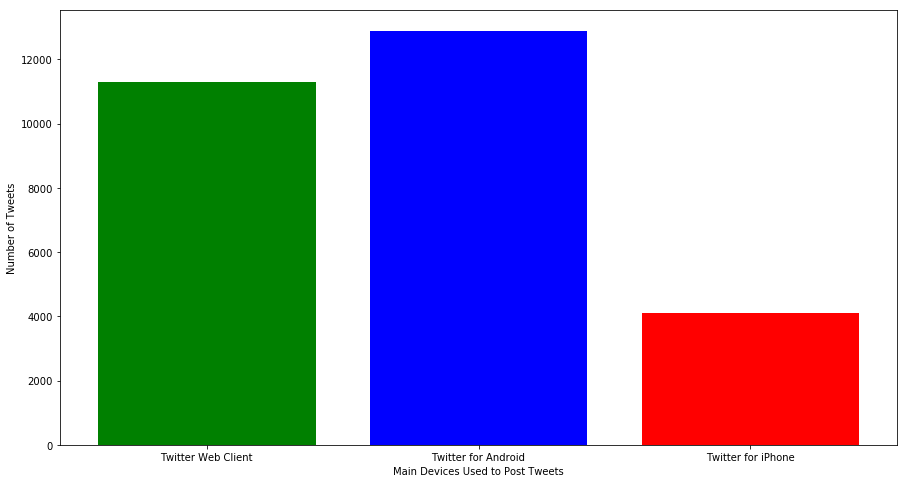

In [3]:
d = {}

for values in df.source.values:
    if(values in d):
        d[values] += 1
    else:
        d[values] = 1

d = retain_most_used(d, 500)

plt.figure(figsize=(15, 8))
android, web, iphone = plt.bar(np.arange(0, 3), list(d.values()))
plt.xticks([0, 1, 2], list(d.keys()))
android.set_facecolor('g')
web.set_facecolor('b')
iphone.set_facecolor('r')
plt.ylabel("Number of Tweets")
plt.xlabel("Main Devices Used to Post Tweets")
plt.show()

I then decided to narrow down the data I was looking at to more recent times. So I looked at the data from the announcement date onwards.

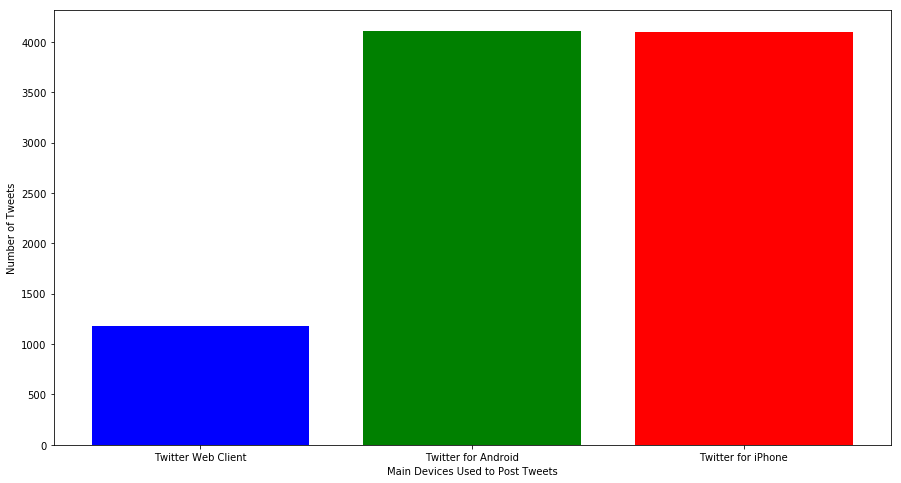

In [4]:
d = {}

for values in df.source[0:index_of_date(df, '06-14-2015',
                                        first_or_last='first')].values:
    if(values in d):
        d[values] += 1
    else:
        d[values] = 1

d = retain_most_used(d, 500)

plt.figure(figsize=(15, 8))
web, android, iphone = plt.bar(np.arange(0, 3), list(d.values()))
plt.xticks([0, 1, 2], list(d.keys()))
android.set_facecolor('g')
web.set_facecolor('b')
iphone.set_facecolor('r')
plt.ylabel("Number of Tweets")
plt.xlabel("Main Devices Used to Post Tweets")
plt.show()

I decided to look at the average daily time at which the tweets were sent out. I wrote a function to do just that.
I'd heard that Trump used Android to post and his team during the campaign used iPhones to post. I decided to look at how the posting time varied according to devices.

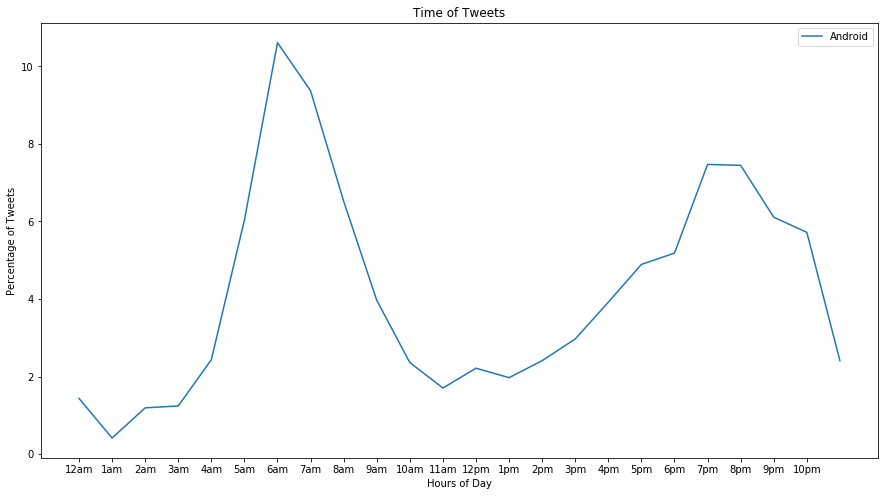

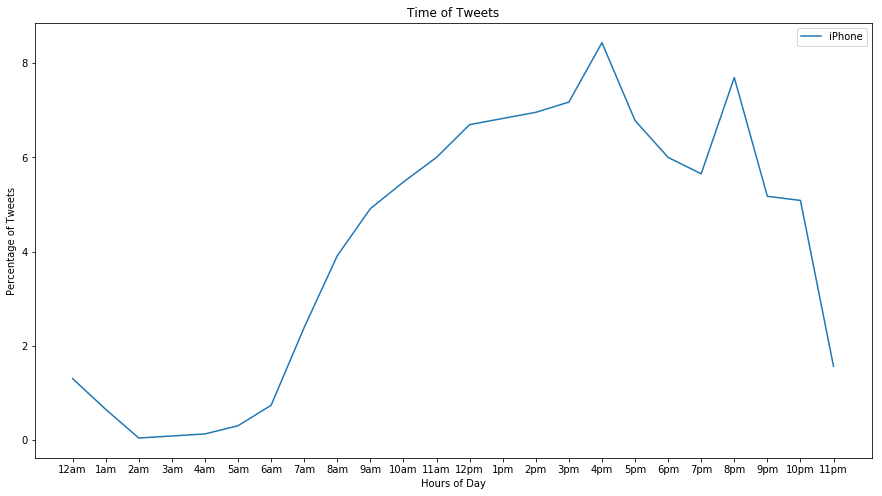

In [3]:
get_data = data_using(data)
and_list = get_data(df, 'Android')
times_list = ['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am',
              '8am', '9am', '10am', '11am', '12pm', '1pm', '2pm', '3pm',
              '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm']
lbl_android = plot_time_of_day(and_list, 'Android')
plt.legend([lbl_android], ['Android'])
plt.xticks(range(0,23), times_list)
plt.show()
iph_list = get_data(df, 'iPhone')

lbl_iphone = plot_time_of_day(iph_list, 'iPhone')
plt.legend([lbl_iphone], ['iPhone'])
plt.xticks(range(0,24), times_list)
plt.show()

Shows clear difference regarding when which device is used.

Looking at average daily tweet count over the years.

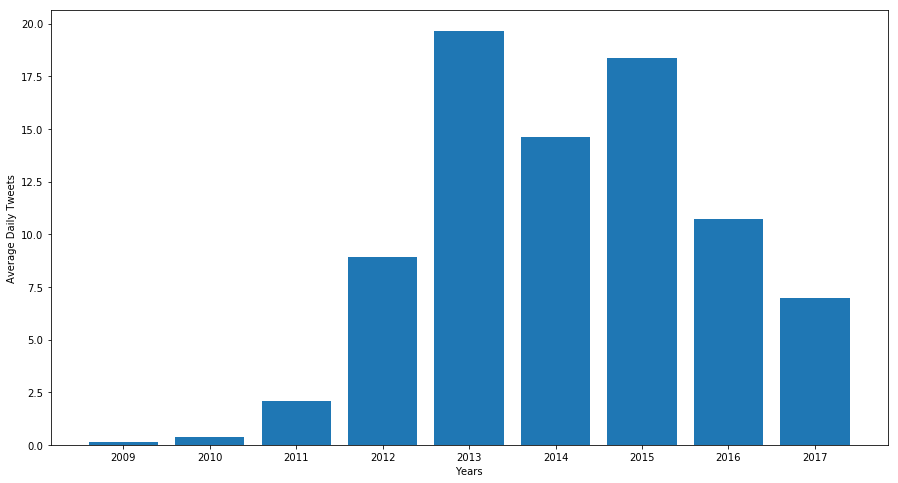

In [7]:
df['date'], df['time'] = df.created_at.str.split(' ', 1).str
df['month'], df['day'], df['year'] = df['date'].str.split('-', 3).str

years = range(2009, 2018)

average_daily_tweets = []
years_in_tweets = df['year'].values.tolist()

for year in years:
    if(year == 2017):
        num_days = (datetime.datetime.now().date() - datetime.date(2017,
                    1, 1)).days
    elif(year % 4 == 0):
        num_days = 366
    else:
        num_days = 365
    average_daily_tweets.append(years_in_tweets.count(str(year)) / num_days)

plt.figure(figsize=(15, 8))
plt.bar(years, average_daily_tweets)
plt.xticks(years)
plt.xlabel("Years")
plt.ylabel("Average Daily Tweets")
plt.show()

He's actually tweeted less and less since announcing his run in 2015.

Now for the word frequency distributions. Here is the overall one.

Overall Most Common Words

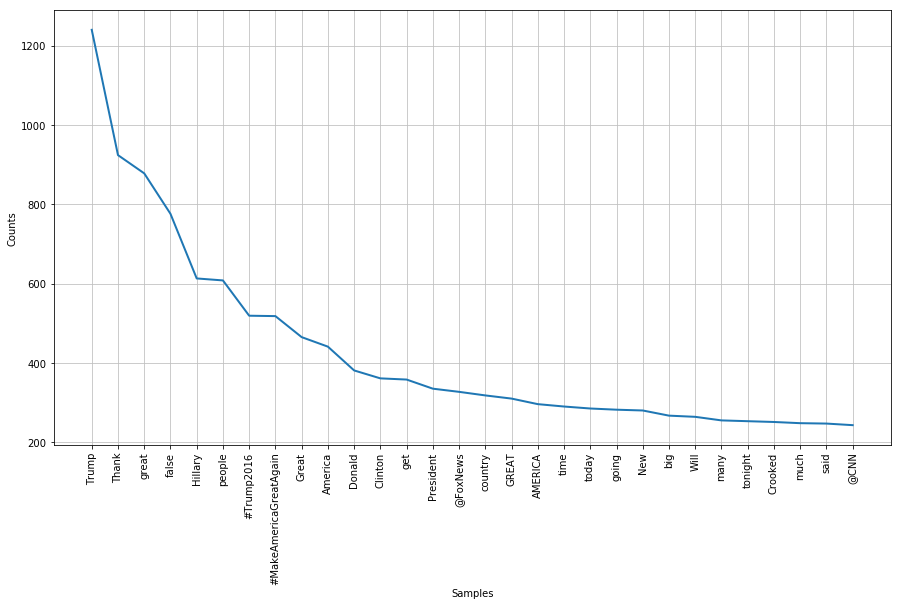

In [10]:
freq_dist(df)

Now for Android.

Android Most Common Words

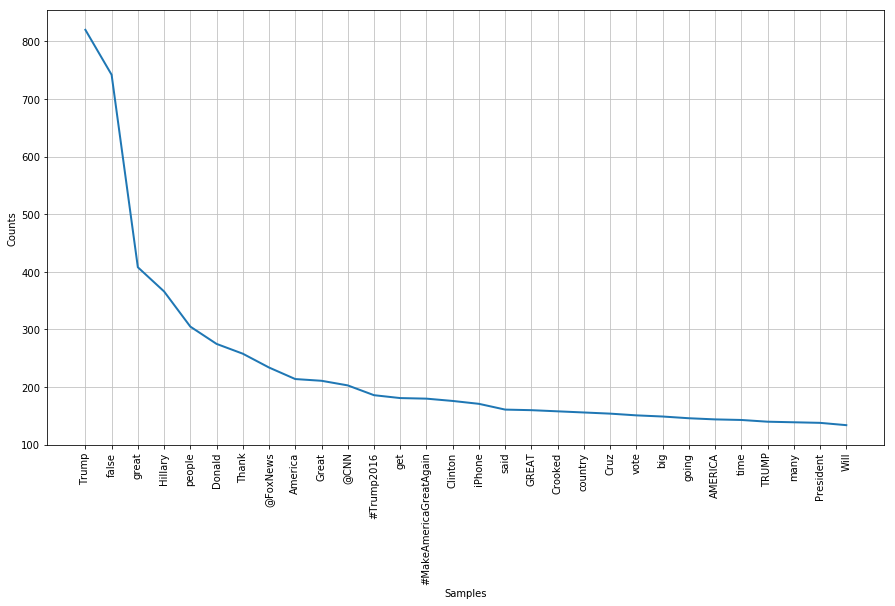

In [9]:
freq_dist(df, 'Android')

And now for iPhone 

iPhone Most Common Words

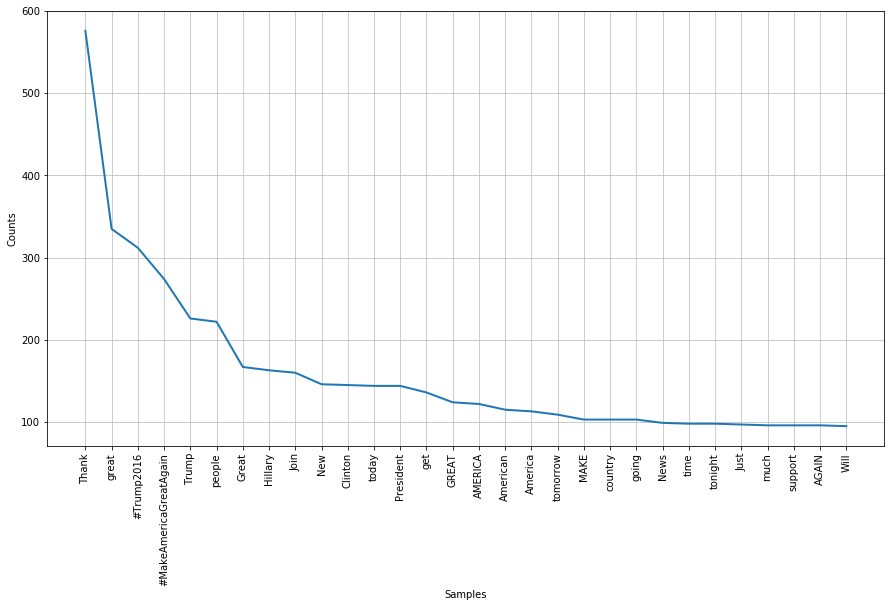

In [10]:
freq_dist(df, 'iPhone')

Now we move on to the sentiment analysis on the tweets. I first look at the average negetivity scores according to hour of day.

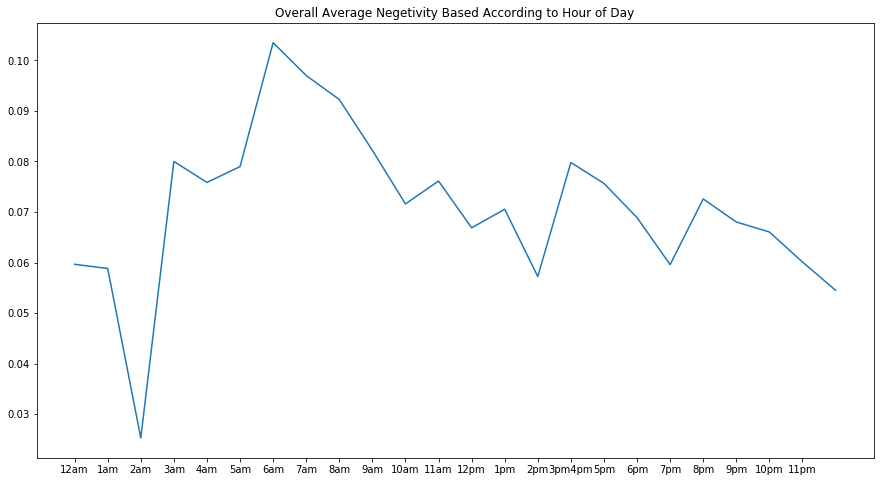

In [11]:
sid = SentimentIntensityAnalyzer()
src = None
type_of_vader = 'neg'
tweets = df.text.values

d_sentiment = {}
d_count = {}

# Date when android tweets stopped
i = index_of_date(df, '03-08-2017', first_or_last='last')
# Date of announcement of candidacy
last = index_of_date(df, '06-14-2015', first_or_last='first')
while(i < last):
    if(src is not None):
        if(df.source.values[i] == "Twitter for " + src):
            t = time_to_number(df.created_at[i][11:19])
            if(t == 24):
                t = 0
            s = sid.polarity_scores(tweets[i])
            if(t in d_sentiment and t in d_count):
                d_sentiment[t] += s[type_of_vader]
                d_count[t] += 1
            else:
                d_sentiment[t] = s[type_of_vader]
                d_count[t] = 1
    else:
        t = time_to_number(df.created_at[i][11:19])
        if(t == 24):
            t = 0
        s = sid.polarity_scores(tweets[i])
        if(t in d_sentiment and t in d_count):
            d_sentiment[t] += s[type_of_vader]
            d_count[t] += 1
        else:
            d_sentiment[t] = s[type_of_vader]
            d_count[t] = 1
    i += 1

d_average_sentiment = [d_sentiment[i] / d_count[i] for i in range(0, 24)]


d = deque(d_average_sentiment)
d.rotate(-6)
plt.figure(figsize=(15, 8))
plt.plot(range(0, 24), d)
plt.title("Overall Average Negetivity Based According to Hour of Day")
plt.xticks(range(0,23), times_list)
plt.show()

So negetivity peaks around 5am.

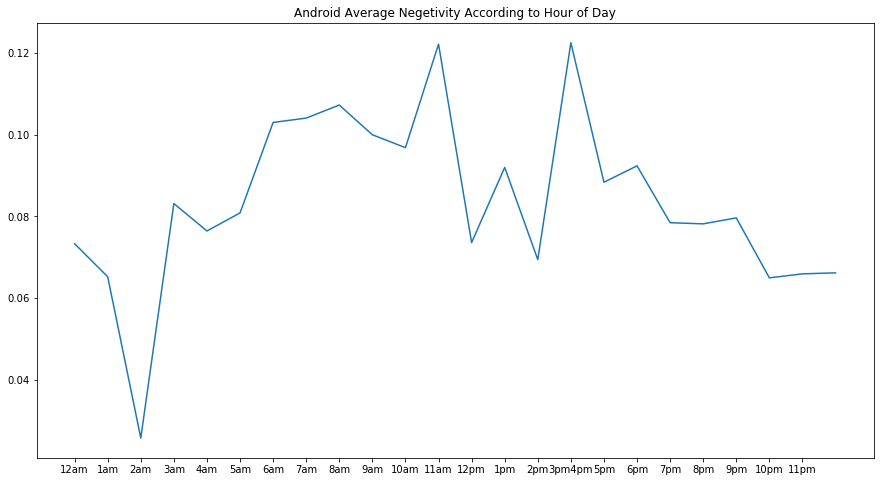

In [20]:
sid = SentimentIntensityAnalyzer()
src = 'Android'
type_of_vader = 'neg'
tweets = df.text.values

d_sentiment = {}
d_count = {}

# Date when android tweets stopped
i = index_of_date(df, '03-08-2017', first_or_last='last')
# Date of announcement of candidacy
last = index_of_date(df, '06-14-2015', first_or_last='first')
while(i < last):
    if(src is not None):
        if(df.source.values[i] == "Twitter for " + src):
            t = time_to_number(df.created_at[i][11:19])
            if(t == 24):
                t = 0
            s = sid.polarity_scores(tweets[i])
            if(t in d_sentiment and t in d_count):
                d_sentiment[t] += s[type_of_vader]
                d_count[t] += 1
            else:
                d_sentiment[t] = s[type_of_vader]
                d_count[t] = 1
    else:
        t = time_to_number(df.created_at[i][11:19])
        if(t == 24):
            t = 0
        s = sid.polarity_scores(tweets[i])
        if(t in d_sentiment and t in d_count):
            d_sentiment[t] += s[type_of_vader]
            d_count[t] += 1
        else:
            d_sentiment[t] = s[type_of_vader]
            d_count[t] = 1
    i += 1

d_average_sentiment = [d_sentiment[i] / d_count[i] for i in range(0, 24)]


d = deque(d_average_sentiment)
d.rotate(-6)
plt.figure(figsize=(15, 8))
plt.plot(range(0, 24), d)
plt.title("Android Average Negetivity According to Hour of Day")
plt.xticks(range(0,23), times_list)
plt.show()

Average negetivity seems higher overall with 2 big peaks at 10am and 3pm

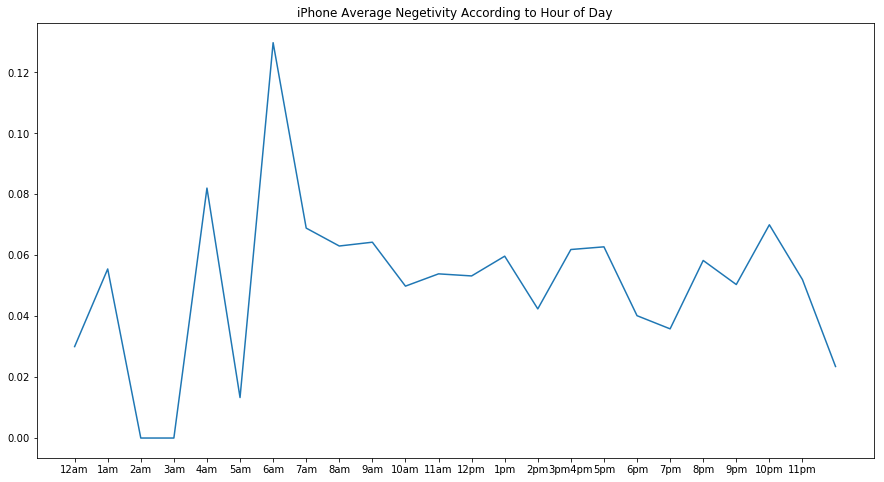

In [13]:
sid = SentimentIntensityAnalyzer()
src = "iPhone"
type_of_vader = 'neg'
tweets = df.text.values

d_sentiment = {}
d_count = {}

# Date when android tweets stopped
i = index_of_date(df, '03-08-2017', first_or_last='last')
# Date of announcement of candidacy
last = index_of_date(df, '06-14-2015', first_or_last='first')
while(i < last):
    if(src is not None):
        if(df.source.values[i] == "Twitter for " + src):
            t = time_to_number(df.created_at[i][11:19])
            if(t == 24):
                t = 0
            s = sid.polarity_scores(tweets[i])
            if(t in d_sentiment and t in d_count):
                d_sentiment[t] += s[type_of_vader]
                d_count[t] += 1
            else:
                d_sentiment[t] = s[type_of_vader]
                d_count[t] = 1
    else:
        t = time_to_number(df.created_at[i][11:19])
        if(t == 24):
            t = 0
        s = sid.polarity_scores(tweets[i])
        if(t in d_sentiment and t in d_count):
            d_sentiment[t] += s[type_of_vader]
            d_count[t] += 1
        else:
            d_sentiment[t] = s[type_of_vader]
            d_count[t] = 1
    i += 1

d_average_sentiment = [d_sentiment[i] / d_count[i] for i in range(0, 24)]


d = deque(d_average_sentiment)
d.rotate(-6)
plt.figure(figsize=(15, 8))
plt.plot(range(0, 24), d)
plt.title("iPhone Average Negetivity According to Hour of Day")
plt.xticks(range(0,23), times_list)
plt.show()

There's a big peak here at 6am in keeping with the overall plot.

Now I look at the average compound scores.

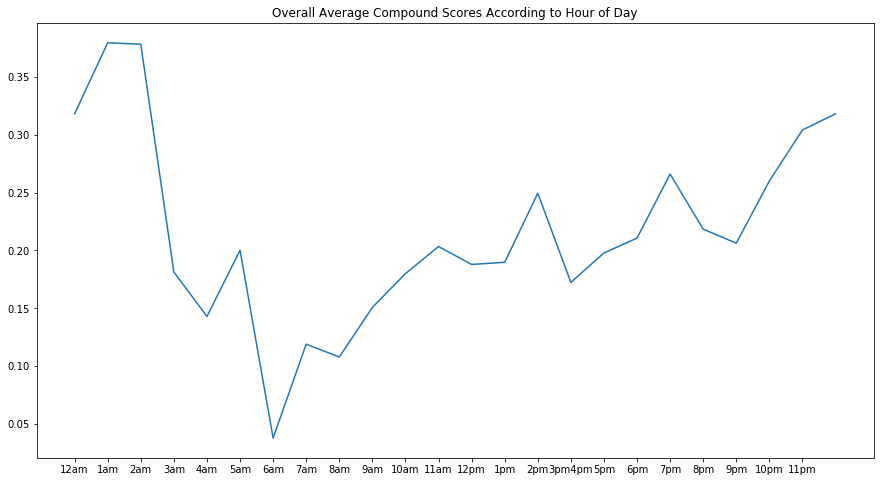

In [14]:
sid = SentimentIntensityAnalyzer()
src = None
type_of_vader = 'compound'
tweets = df.text.values

d_sentiment = {}
d_count = {}

# Date when android tweets stopped
i = index_of_date(df, '03-08-2017', first_or_last='last')
# Date of announcement of candidacy
last = index_of_date(df, '06-14-2015', first_or_last='first')
while(i < last):
    if(src is not None):
        if(df.source.values[i] == "Twitter for " + src):
            t = time_to_number(df.created_at[i][11:19])
            if(t == 24):
                t = 0
            s = sid.polarity_scores(tweets[i])
            if(t in d_sentiment and t in d_count):
                d_sentiment[t] += s[type_of_vader]
                d_count[t] += 1
            else:
                d_sentiment[t] = s[type_of_vader]
                d_count[t] = 1
    else:
        t = time_to_number(df.created_at[i][11:19])
        if(t == 24):
            t = 0
        s = sid.polarity_scores(tweets[i])
        if(t in d_sentiment and t in d_count):
            d_sentiment[t] += s[type_of_vader]
            d_count[t] += 1
        else:
            d_sentiment[t] = s[type_of_vader]
            d_count[t] = 1
    i += 1

d_average_sentiment = [d_sentiment[i] / d_count[i] for i in range(0, 24)]


d = deque(d_average_sentiment)
d.rotate(-6)
plt.figure(figsize=(15, 8))
plt.plot(range(0, 24), d)
plt.title("Overall Average Compound Scores According to Hour of Day")
plt.xticks(range(0,23), times_list)
plt.show()

Here, the compound score is lowest around 6am as before.

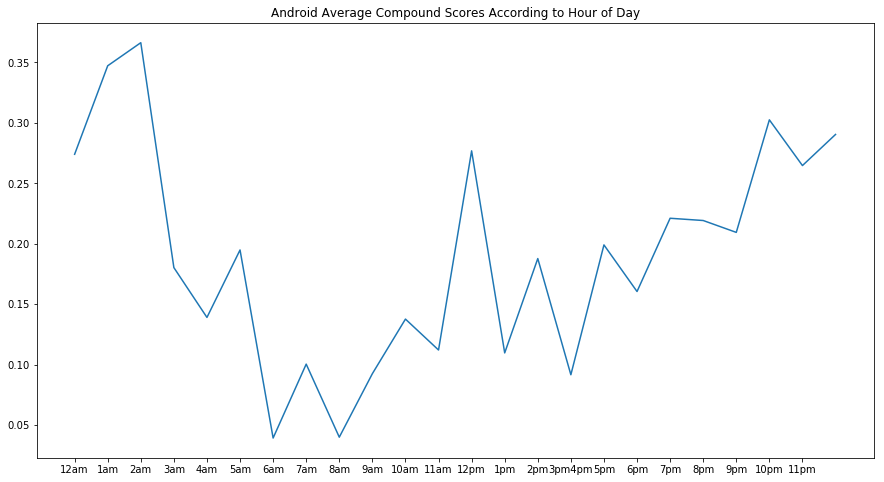

In [15]:
sid = SentimentIntensityAnalyzer()
src = "Android"
type_of_vader = 'compound'
tweets = df.text.values

d_sentiment = {}
d_count = {}

# Date when android tweets stopped
i = index_of_date(df, '03-08-2017', first_or_last='last')
# Date of announcement of candidacy
last = index_of_date(df, '06-14-2015', first_or_last='first')
while(i < last):
    if(src is not None):
        if(df.source.values[i] == "Twitter for " + src):
            t = time_to_number(df.created_at[i][11:19])
            if(t == 24):
                t = 0
            s = sid.polarity_scores(tweets[i])
            if(t in d_sentiment and t in d_count):
                d_sentiment[t] += s[type_of_vader]
                d_count[t] += 1
            else:
                d_sentiment[t] = s[type_of_vader]
                d_count[t] = 1
    else:
        t = time_to_number(df.created_at[i][11:19])
        if(t == 24):
            t = 0
        s = sid.polarity_scores(tweets[i])
        if(t in d_sentiment and t in d_count):
            d_sentiment[t] += s[type_of_vader]
            d_count[t] += 1
        else:
            d_sentiment[t] = s[type_of_vader]
            d_count[t] = 1
    i += 1

d_average_sentiment = [d_sentiment[i] / d_count[i] for i in range(0, 24)]


d = deque(d_average_sentiment)
d.rotate(-6)
plt.figure(figsize=(15, 8))
plt.plot(range(0, 24), d)
plt.title("Android Average Compound Scores According to Hour of Day")
plt.xticks(range(0,23), times_list)
plt.show()

Again, there's a low around the early morning hours.

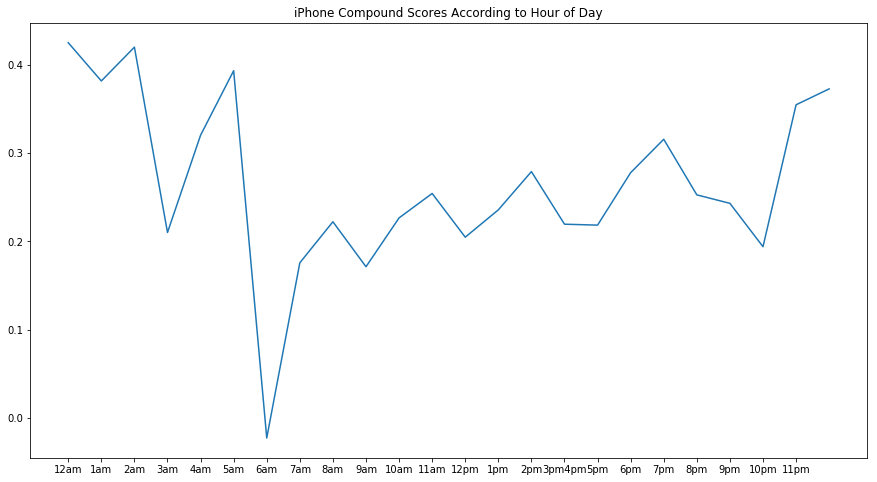

In [21]:
sid = SentimentIntensityAnalyzer()
src = "iPhone"
type_of_vader = 'compound'
tweets = df.text.values

d_sentiment = {}
d_count = {}

# Date when android tweets stopped
i = index_of_date(df, '03-08-2017', first_or_last='last')
# Date of announcement of candidacy
last = index_of_date(df, '06-14-2015', first_or_last='first')
while(i < last):
    if(src is not None):
        if(df.source.values[i] == "Twitter for " + src):
            t = time_to_number(df.created_at[i][11:19])
            if(t == 24):
                t = 0
            s = sid.polarity_scores(tweets[i])
            if(t in d_sentiment and t in d_count):
                d_sentiment[t] += s[type_of_vader]
                d_count[t] += 1
            else:
                d_sentiment[t] = s[type_of_vader]
                d_count[t] = 1
    else:
        t = time_to_number(df.created_at[i][11:19])
        if(t == 24):
            t = 0
        s = sid.polarity_scores(tweets[i])
        if(t in d_sentiment and t in d_count):
            d_sentiment[t] += s[type_of_vader]
            d_count[t] += 1
        else:
            d_sentiment[t] = s[type_of_vader]
            d_count[t] = 1
    i += 1

d_average_sentiment = [d_sentiment[i] / d_count[i] for i in range(0, 24)]


d = deque(d_average_sentiment)
d.rotate(-6)
plt.figure(figsize=(15, 8))
plt.plot(range(0, 24), d)
plt.title("iPhone Compound Scores According to Hour of Day")
plt.xticks(range(0,23), times_list)
plt.show()

Again, there's a dip in compound scores around 6am.